In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('dogvscat'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dogvscat\test\0\250.jpg
dogvscat\test\0\251.jpg
dogvscat\test\0\252.jpg
dogvscat\test\0\253.jpg
dogvscat\test\0\254.jpg
dogvscat\test\0\255.jpg
dogvscat\test\0\256.jpg
dogvscat\test\0\257.jpg
dogvscat\test\0\258.jpg
dogvscat\test\0\259.jpg
dogvscat\test\0\260.jpg
dogvscat\test\0\261.jpg
dogvscat\test\0\262.jpg
dogvscat\test\0\263.jpg
dogvscat\test\0\264.jpg
dogvscat\test\0\265.jpg
dogvscat\test\0\266.jpg
dogvscat\test\0\267.jpg
dogvscat\test\0\268.jpg
dogvscat\test\0\269.jpg
dogvscat\test\0\270.jpg
dogvscat\test\0\271.jpg
dogvscat\test\0\272.jpg
dogvscat\test\0\273.jpg
dogvscat\test\0\274.jpg
dogvscat\test\1\250.jpg
dogvscat\test\1\251.jpg
dogvscat\test\1\252.jpg
dogvscat\test\1\253.jpg
dogvscat\test\1\254.jpg
dogvscat\test\1\255.jpg
dogvscat\test\1\256.jpg
dogvscat\test\1\257.jpg
dogvscat\test\1\258.jpg
dogvscat\test\1\259.jpg
dogvscat\test\1\260.jpg
dogvscat\test\1\261.jpg
dogvscat\test\1\262.jpg
dogvscat\test\1\263.jpg
dogvscat\test\1\264.jpg
dogvscat\test\1\265.jpg
dogvscat\test\1\

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score


In [3]:
train_dir = '../input/dog-vs-cat/dogvscat/train'
test_dir = '../input/dog-vs-cat/dogvscat/test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the training and testing datasets
train_dir = 'dogvscat/train'
test_dir = 'dogvscat/test'

# Creating ImageDataGenerators for data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating batches of tensor image data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resizing images to 224x224
    batch_size=20,          # Batch size
    class_mode='binary'     # Binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)


Found 550 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [5]:
model = Sequential()

In [6]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-3), metrics=['accuracy'])

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 20,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // 20
)


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5338 - loss: 0.8109 - val_accuracy: 0.5250 - val_loss: 0.6920
Epoch 2/10
 1/27 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5500 - loss: 0.6928

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5500 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4944 - loss: 0.6973 - val_accuracy: 0.4750 - val_loss: 0.6922
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5500 - loss: 0.6893 - val_accuracy: 0.4750 - val_loss: 0.6912
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5064 - loss: 0.6940 - val_accuracy: 0.5500 - val_loss: 0.6888
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6500 - loss: 0.6875 - val_accuracy: 0.5000 - val_loss: 0.6839
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4705 - loss: 0.7274 - val_accuracy: 0.5000 - val_loss: 0.6906
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5000 - loss: 0.6911 - val_accuracy: 0.4750 - val_loss: 0.6970
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5376 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6557

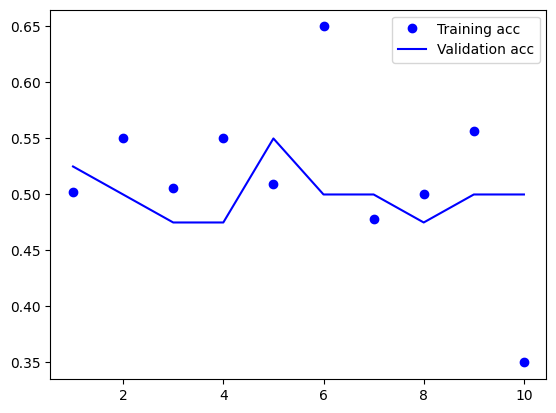

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

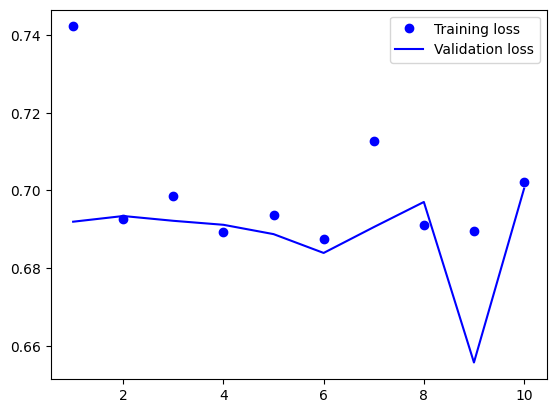

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [12]:
model.save('catvsdog.h5')

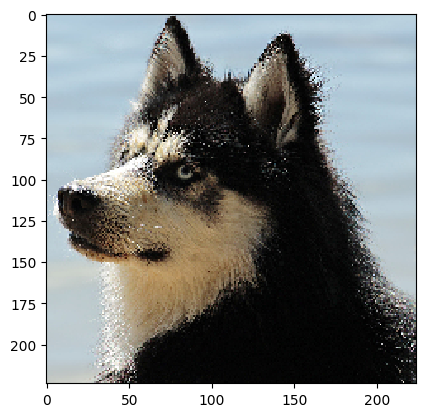

In [13]:
from tensorflow.keras.preprocessing import image
path ='dogvscat/train/1/109.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [14]:
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [15]:
img_array=img_array.reshape(1,224,224,3)

In [16]:
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
dog


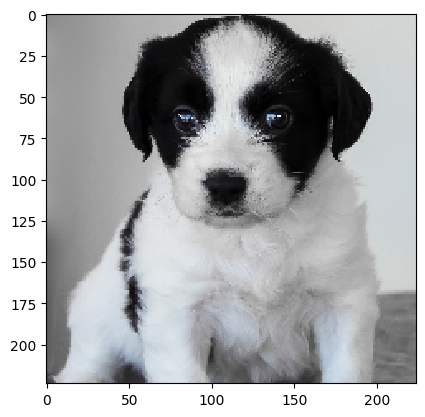

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
dog


In [17]:

from tensorflow.keras.preprocessing import image
path ='dogvscat/test/1/256.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()
img_array = np.array(img)
img_array.shape
img_array=img_array.reshape(1,224,224,3)
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')

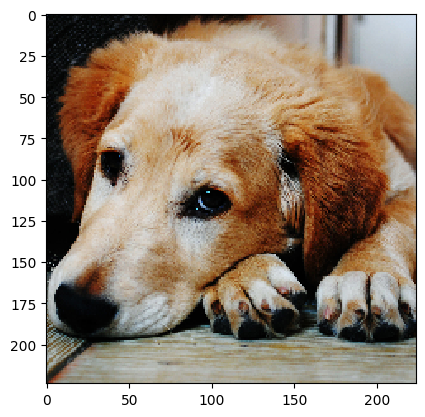

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
dog


In [18]:
path ='dogvscat/train/1/0.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()
img_array = np.array(img)
img_array.shape
img_array=img_array.reshape(1,224,224,3)
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')